In [1]:
pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
import matplotlib.pyplot as plt

In [3]:
import torchvision.transforms as transforms
from torchvision import datasets

In [4]:
#Loading Pretrained data
train_dataset = datasets.MNIST(root='./data', train=True,transform=transforms.ToTensor(),download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 67.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 11.0MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 88.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.96MB/s]


In [5]:
#Loading Test data
test_dataset = datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor())

In [6]:
print("number of training samples: " + str(len(train_dataset)) + "\n" +
      "number of testing samples: " + str(len(test_dataset)))

number of training samples: 60000
number of testing samples: 10000


In [7]:
print("datatype of the 1st training sample: ", train_dataset[0][0].type())
print("size of the 1st training sample: ", train_dataset[0][0].size())

datatype of the 1st training sample:  torch.FloatTensor
size of the 1st training sample:  torch.Size([1, 28, 28])


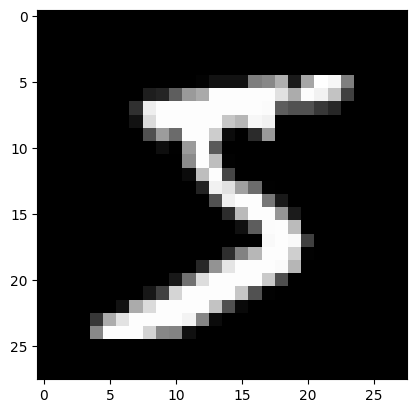

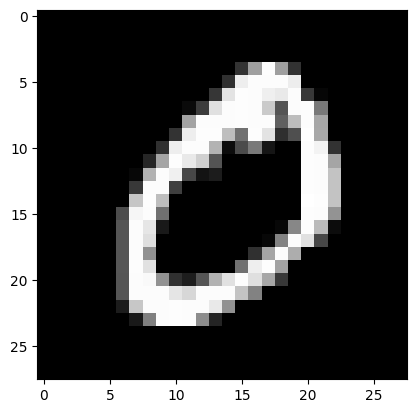

In [8]:
img_5 = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(img_5, cmap='gray')
plt.show()
img_0 = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(img_0, cmap='gray')
plt.show()

In [9]:
from torch.utils.data import DataLoader
# load train and test data samples into dataloader
batach_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batach_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batach_size, shuffle=False)

In [10]:
import torch
class LogisticRegression(torch.nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [11]:
n_inputs = 28*28
n_outputs = 10
log_regr = LogisticRegression(n_inputs, n_outputs)

In [12]:
optimizer = torch.optim.SGD(log_regr.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

epochs = 50
Loss = []
acc = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = log_regr(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    for images, labels in test_loader:
        outputs = log_regr(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

Epoch: 0. Loss: 2.22398042678833. Accuracy: 61.64
Epoch: 1. Loss: 2.107466220855713. Accuracy: 73.01
Epoch: 2. Loss: 2.033501625061035. Accuracy: 77.24
Epoch: 3. Loss: 1.9859768152236938. Accuracy: 79.28
Epoch: 4. Loss: 1.9707183837890625. Accuracy: 80.43
Epoch: 5. Loss: 1.928355097770691. Accuracy: 81.17
Epoch: 6. Loss: 1.9660040140151978. Accuracy: 81.5
Epoch: 7. Loss: 1.8933424949645996. Accuracy: 81.93
Epoch: 8. Loss: 1.883850336074829. Accuracy: 82.22
Epoch: 9. Loss: 1.9011436700820923. Accuracy: 82.48
Epoch: 10. Loss: 1.9113367795944214. Accuracy: 82.76
Epoch: 11. Loss: 1.8578470945358276. Accuracy: 83.02
Epoch: 12. Loss: 1.7664434909820557. Accuracy: 83.23
Epoch: 13. Loss: 1.8148912191390991. Accuracy: 83.37
Epoch: 14. Loss: 1.8263013362884521. Accuracy: 83.56
Epoch: 15. Loss: 1.7902610301971436. Accuracy: 83.74
Epoch: 16. Loss: 1.80551278591156. Accuracy: 83.96
Epoch: 17. Loss: 1.783886194229126. Accuracy: 84.17
Epoch: 18. Loss: 1.8059178590774536. Accuracy: 84.28
Epoch: 19. Lo

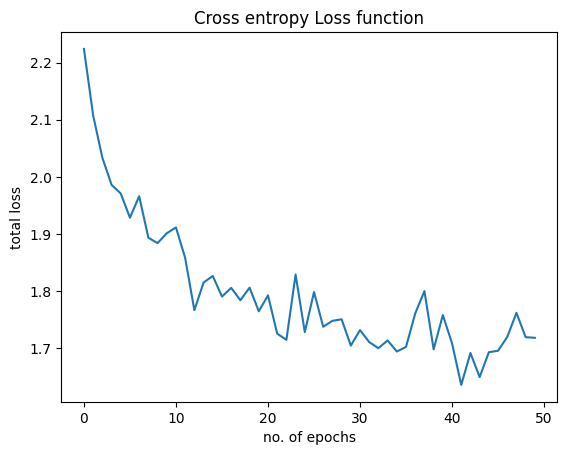

In [13]:
plt.plot(Loss)
plt.xlabel("no. of epochs")
plt.ylabel("total loss")
plt.title("Cross entropy Loss function")
plt.show()

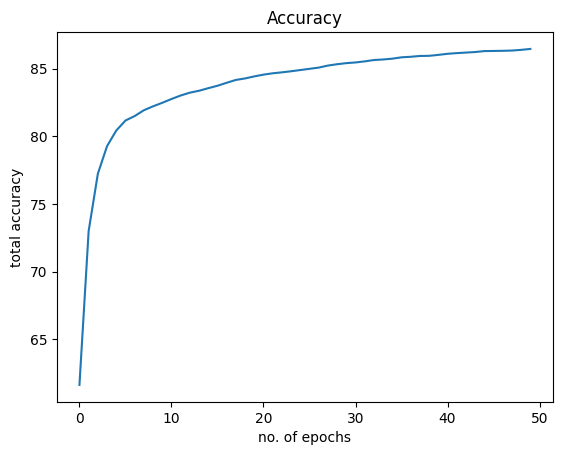

In [14]:
plt.plot(acc)
plt.xlabel("no. of epochs")
plt.ylabel("total accuracy")
plt.title("Accuracy")
plt.show()

In [15]:
print("label of the first testing sample: ", test_dataset[0][1])
print("label of the second testing sample: ", test_dataset[1][1])

label of the first testing sample:  7
label of the second testing sample:  2


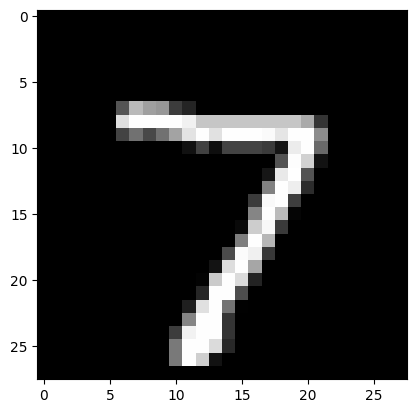

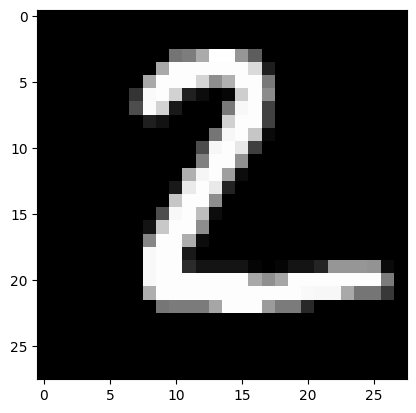

In [16]:
img_7 = test_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(img_7, cmap='gray')
plt.show()
img_2 = test_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(img_2, cmap='gray')
plt.show()

Actual Label: 1, Predicted Label: 1


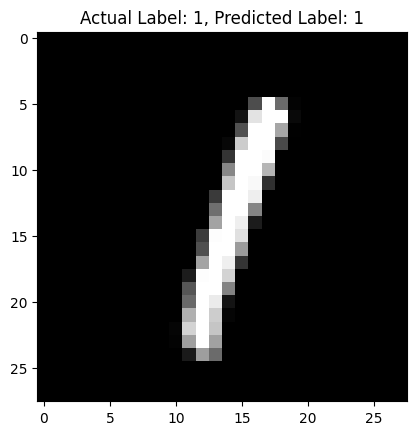

In [17]:
#Prediction 1
sample_index =  5
sample_image, sample_label = test_dataset[sample_index]
output = log_regr(sample_image.view(-1, 28*28))
_, predicted_class = torch.max(output, 1)
print(f"Actual Label: {sample_label}, Predicted Label: {predicted_class.item()}")

sample_image = sample_image.numpy().reshape(28, 28)
plt.imshow(sample_image, cmap='gray')
plt.title(f"Actual Label: {sample_label}, Predicted Label: {predicted_class.item()}")
plt.show()

Actual Label: 6, Predicted Label: 6


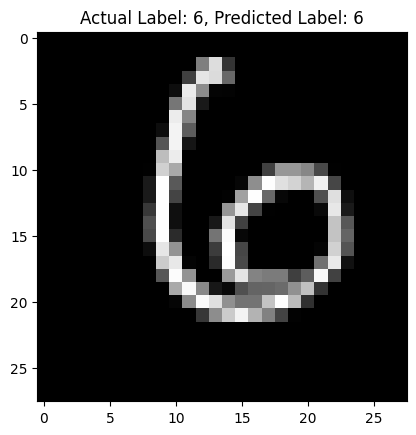

In [18]:
#Prediction 2
sample_index =  100
sample_image, sample_label = test_dataset[sample_index]
output = log_regr(sample_image.view(-1, 28*28))
_, predicted_class = torch.max(output, 1)
print(f"Actual Label: {sample_label}, Predicted Label: {predicted_class.item()}")

sample_image = sample_image.numpy().reshape(28, 28)
plt.imshow(sample_image, cmap='gray')
plt.title(f"Actual Label: {sample_label}, Predicted Label: {predicted_class.item()}")
plt.show()